Voir à la fin pour les pistes d'amélioration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd 
import plotly.express as px          # Super lib, mieux que matplotlib data vis
import plotly.graph_objects as go    # Pour faire des bougies, c'est magnifique
# nbformat, ipykernel 
# Faire un autre projet avec cufflinks et pis un peu d'IA sur sklearn 

# Quelques bases et exemples sur Pandas 

Panda : bien comprendre relation et différence entre **DataFrame et les Séries** et l'accès aux éléments  
Soit df un dataframe, df["col1"] renvoie une série alors que df[["col1"]] renvoie un dataframe avec que la colonne 1. df[["col1","col3"]] renvoie df avec col1 et 3  
  
Une série un **tableau unidimensionnel avec valeurs associés à un index**  
-- > L'accès se fait comme pour un tableau, par index ou slicing  
  
Un dataframe est une **structure de données bidimensionnelle**  
-- > Accès colonne par []  
-- > Accès ligne par **iloc si on fait par position** et **loc si on fait par labels**  
-- > Accès élément spécifique par loc/iloc[ligne, colonne]  

        Poser au clair quel est l'index, que sont les colonnes et pas modifier l'ordre sur des ilocs :)  
  
.   
Bonus : Pour avoir plusieurs dimensions, on peut utiliser des df à **multi-index** (df.set_index['Stock', 'Month'])  
-- > Exemple pour avoir toutes les colonnes pour tout les stocks mais que en Janvier : df.loc[pd.IndexSlice[:,"Janv"],:]

In [2]:
#Exemple 
dates = pd.date_range('2024-01-01', periods=3, freq='D')  # Index de 3 jours
df = pd.DataFrame({'A': [1, None, 3], 'B': [4, 5, 6]}, index=dates)
df

,A,B
2024-01-01,1.0,4
2024-01-02,NaN,5
2024-01-03,3.0,6


In [3]:
print(df.iloc[1])               # Accès par index
print(df.loc['2024-01-02'])     # Accès par label
# Accéder au 6 par exemple
print(df["B"].iloc[2])

A    NaN
B    5.0
Name: 2024-01-02 00:00:00, dtype: float64
A    NaN
B    5.0
Name: 2024-01-02 00:00:00, dtype: float64
6


In [4]:
# Convertir un tableau numpy 
df.values

array([[ 1.,  4.],
       [nan,  5.],
       [ 3.,  6.]])

La méthode **rolling** permet d'effectuer des calculs sur des fenêtres glissantes (vers l'arrière) et donc calculer la MM15 par exemple  
**Nettoyer les données** est essentiel, rapidement qq fonctions sympas pour trier et supprimer les valeurs manquantes:

In [5]:
mm2 = df.rolling(2).mean()
print(mm2)
# Nettoyage   -- > Efface bien la valeur Nulle de la colA  mais attention, ça supprime toute la ligne, y compris la valeur 5 de la colB !
df.sort_index(ascending=True).dropna() 

             A    B
2024-01-01 NaN  NaN
2024-01-02 NaN  4.5
2024-01-03 NaN  5.5


,A,B
2024-01-01,1.0,4
2024-01-03,3.0,6


# Part1: Importer les données

In [6]:
# Dans l'ordre, Kering-LVMH-Hermès-Richemont-Intel-Apple-Nvidia   (c'est marrant Hermès c'est rms lol)
tickers_symbols = ["KER.PA", "MC.PA", "RMS.PA", "CFR.SW", "INTC", "AAPL", "NVDA"]
tickers = []
for symbol in tickers_symbols:
    tickers.append(yf.Ticker(symbol))

# Dico avec tout les DF séparés
stocks_dico={}
for i in range(0, len(tickers)):

    # Petite rallonge pour changer le format de la date en yyyy-mm-dd
    data = tickers[i].history(period="5y")
    data.index = data.index.strftime('%Y-%m-%d')

    # Limiter à 2 chiffres après virgules
    numeric_cols = data.select_dtypes('float64').columns  # Sélectionner les colonnes numériques
    data[numeric_cols] = data[numeric_cols].round(2)  # Appliquer l'arrondi uniquement aux colonnes numériques
    

    #Stockage dico
    stocks_dico[tickers_symbols[i]] = data


Structure donnée : On a un dictionnaire avec comme clé les symboles des stocks et comme valeur les DataFrammes

In [7]:
# Print de vérification
for key, value in stocks_dico.items():
    print(f"Ticker: {key}")
    print(value.head(2))
    print("\n")

Ticker: KER.PA
              Open    High     Low   Close  Volume  Dividends  Stock Splits
Date                                                                       
2019-11-07  460.23  461.80  457.51  458.65  167962        0.0           0.0
2019-11-08  458.04  458.83  451.82  454.71  178213        0.0           0.0


Ticker: MC.PA
              Open    High     Low   Close  Volume  Dividends  Stock Splits
Date                                                                       
2019-11-07  374.71  377.00  373.59  376.58  474972        0.0           0.0
2019-11-08  374.94  377.09  372.85  375.64  464275        0.0           0.0


Ticker: RMS.PA
              Open    High     Low   Close  Volume  Dividends  Stock Splits
Date                                                                       
2019-11-07  631.36  635.82  626.71  626.90   61966        0.0           0.0
2019-11-08  626.12  630.58  624.96  629.03   47101        0.0           0.0


Ticker: CFR.SW
             Open   Hig

In [8]:
# Créer un gros Dataframe avec tout les stocks
stocks = pd.concat(stocks_dico, axis=1)

# Vérification structure données et types, important !

Nous avons un **Multi-index Dataframe, waou !**

In [9]:
stocks.head()

KER.PA                                                           \
              Open    High     Low   Close    Volume Dividends Stock Splits   
Date                                                                          
2019-11-07  460.23  461.80  457.51  458.65  167962.0       0.0          0.0   
2019-11-08  458.04  458.83  451.82  454.71  178213.0       0.0          0.0   
2019-11-11  450.16  457.16  446.57  455.59  118083.0       0.0          0.0   
2019-11-12  459.44  469.33  457.95  466.88  255920.0       0.0          0.0   
2019-11-13  465.21  468.71  463.38  468.71  199163.0       0.0          0.0   

             MC.PA                  ...         AAPL                         \
              Open    High     Low  ...       Volume Dividends Stock Splits   
Date                                ...                                       
2019-11-07  374.71  377.00  373.59  ...   94940400.0      0.19          0.0   
2019-11-08  374.94  377.09  372.85  ...   69986400.0      0.00          0.0   
2019-11-11  373.22  376.11  372.10  ...   81821200.0      0.00          0.0   
2019-11-12  376.48  377.79  374.76  ...   87388800.0      0.00          0.0   
2019-11-13  375.64  378.25  374.11  ...  102734400.0      0.00          0.0   

            NVDA                                                        
            Open  High   Low Close       Volume Dividends Stock Splits  
Date                                                                    
2019-11-07  5.25  5.27  5.14  5.18  280340000.0       0.0          0.0  
2019-11-08  5.17  5.20  5.13  5.17  189100000.0       0.0          0.0  
2019-11-11  5.17  5.20  5.08  5.18  243436000.0       0.0          0.0  
2019-11-12  5.22  5.27  5.18  5.21  283504000.0       0.0          0.0  
2019-11-13  5.18  5.21  5.12  5.19  300188000.0       0.0          0.0  

[5 rows x 49 columns]

In [10]:
stocks.shape

(1296, 49)

In [11]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 2019-11-07 to 2024-05-01
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (KER.PA, Open)          1285 non-null   float64
 1   (KER.PA, High)          1285 non-null   float64
 2   (KER.PA, Low)           1285 non-null   float64
 3   (KER.PA, Close)         1285 non-null   float64
 4   (KER.PA, Volume)        1285 non-null   float64
 5   (KER.PA, Dividends)     1285 non-null   float64
 6   (KER.PA, Stock Splits)  1285 non-null   float64
 7   (MC.PA, Open)           1285 non-null   float64
 8   (MC.PA, High)           1285 non-null   float64
 9   (MC.PA, Low)            1285 non-null   float64
 10  (MC.PA, Close)          1285 non-null   float64
 11  (MC.PA, Volume)         1285 non-null   float64
 12  (MC.PA, Dividends)      1285 non-null   float64
 13  (MC.PA, Stock Splits)   1285 non-null   float64
 14  (RMS.PA, Open)          1285 n

In [12]:
# Statistiques descriptives
stats_descriptives = stocks.describe()
stats_descri_transposed = stats_descriptives.T.round(1) 
stats_descri_transposed["max"] = stats_descri_transposed["max"].astype(int)
stats_descri_transposed 

count         mean          std         min  \
KER.PA Open          1285.0        478.5        106.2       218.8   
       High          1285.0        484.3        106.9       222.0   
       Low           1285.0        472.5        105.3       215.4   
       Close         1285.0        478.4        106.1       221.9   
       Volume        1285.0     216488.2     108983.8         0.0   
       Dividends     1285.0          0.0          0.6         0.0   
       Stock Splits  1285.0          0.0          0.0         0.0   
MC.PA  Open          1285.0        608.5        152.1       273.0   
       High          1285.0        614.9        153.1       280.3   
       Low           1285.0        601.7        150.9       261.2   
       Close         1285.0        608.5        152.0       269.9   
       Volume        1285.0     441891.5     270413.4         0.0   
       Dividends     1285.0          0.0          0.4         0.0   
       Stock Splits  1285.0          0.0          0.0         0.0   
RMS.PA Open          1285.0       1372.8        527.0       515.2   
       High          1285.0       1388.0        531.8       541.3   
       Low           1285.0       1357.3        521.6       501.6   
       Close         1285.0       1373.4        526.7       510.4   
       Volume        1285.0      62491.2      38646.2         0.0   
       Dividends     1285.0          0.0          0.5         0.0   
       Stock Splits  1285.0          0.0          0.0         0.0   
CFR.SW Open          1262.0        103.4         28.6        44.4   
       High          1262.0        104.6         28.8        46.0   
       Low           1262.0        102.1         28.3        41.3   
       Close         1262.0        103.4         28.5        45.7   
       Volume        1262.0    1467092.6    1086884.8    329995.0   
       Dividends     1262.0          0.0          0.1         0.0   
       Stock Splits  1262.0          0.0          0.0         0.0   
INTC   Close         1258.0         41.0         10.4        18.9   
       High          1258.0         41.5         10.5        19.1   
       Low           1258.0         40.4         10.3        18.5   
       Open          1258.0         41.0         10.4        19.0   
       Volume        1259.0   38925782.8   23621535.3         0.0   
       Dividends     1259.0          0.0          0.0         0.0   
       Stock Splits  1259.0          0.0          0.0         0.0   
AAPL   Open          1258.0        147.2         41.7        55.5   
       High          1258.0        148.9         41.9        55.6   
       Low           1258.0        145.7         41.5        51.7   
       Close         1258.0        147.4         41.7        54.6   
       Volume        1258.0   92239367.3   52980391.1  24048300.0   
       Dividends     1258.0          0.0          0.0         0.0   
       Stock Splits  1258.0          0.0          0.1         0.0   
NVDA   Open          1258.0         34.5         34.3         5.0   
       High          1258.0         35.1         34.9         5.2   
       Low           1258.0         33.8         33.6         4.5   
       Close         1258.0         34.5         34.3         4.9   
       Volume        1258.0  450658825.9  186088930.3  97884000.0   
       Dividends     1258.0          0.0          0.0         0.0   
       Stock Splits  1258.0          0.0          0.3         0.0   

                             25%          50%          75%         max  
KER.PA Open                415.4        485.8        538.5         728  
       High                421.5        492.3        544.2         730  
       Low                 409.1        481.1        530.4         721  
       Close               415.2        487.7        537.5         725  
       Volume           149647.0     194470.0     247060.0     1239724  
       Dividends             0.0          0.0          0.0           9  
       Stock Splits          0.0          0.0          0.0  

C'est dégeu mais on voit bien les **data gaps**

<Axes: xlabel='None-None', ylabel='Date'>

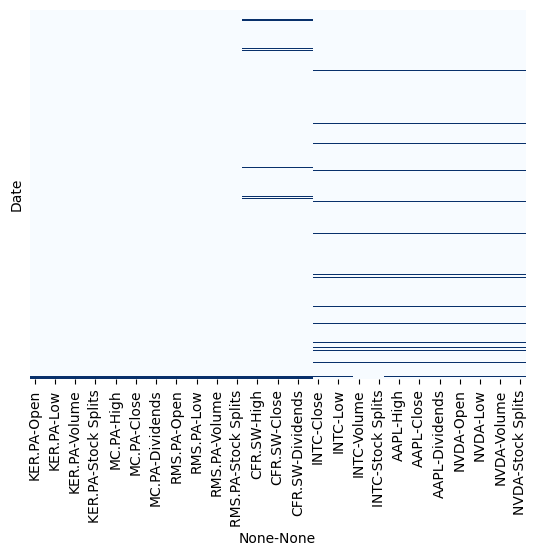

In [13]:
sns.heatmap(stocks.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [14]:
# Clear les data gaps
stocks = stocks.dropna()
for stock in stocks_dico:
    stocks_dico[stock].dropna()

# Part2: Data Visualization

In [15]:
# Closing Prices Over Time
closing_price_df = pd.DataFrame()

for stock in stocks.columns.levels[0]:  # Itérer sur les niveaux du multi-index
    closing_price_df[stock] = stocks[stock]['Close'] 


closing_price_df

,KER.PA,MC.PA,RMS.PA,CFR.SW,INTC,AAPL,NVDA
Date,,,,,,,
2019-11-07,458.65,376.58,626.90,73.25,51.21,62.95,5.18
2019-11-08,454.71,375.64,629.03,69.07,51.40,63.12,5.17
2019-11-11,455.59,375.88,626.71,67.52,51.47,63.62,5.18
2019-11-12,466.88,376.02,622.44,67.11,51.34,63.56,5.21
2019-11-13,468.71,374.57,630.78,66.98,51.06,64.17,5.19
...,...,...,...,...,...,...,...
2024-10-31,228.85,609.80,2074.00,125.35,21.52,225.91,132.76
2024-11-01,230.70,611.00,2081.00,126.55,23.20,222.91,135.40
2024-11-04,233.70,606.70,2071.00,125.00,22.52,222.01,136.05


Affichage séries temporelles

In [16]:
fig = px.line(closing_price_df, x=closing_price_df.index, y=closing_price_df.columns, title="Adjusted Closing Prices")
fig.update_layout(hovermode='x',yaxis_title="Price")  # Survol souris
fig.show()

L'heure des bougies !

In [17]:
# Choix des stocks à afficher sur le graphique en bougie
# Rappel : tickers_symbols = ["KER.PA", "MC.PA", "RMS.PA", "CFR.SW", "INTC", "AAPL", "NVDA"]
tickers_symbols_candel = ["KER.PA", "MC.PA"]

In [18]:
fig = go.Figure()
for symbol in tickers_symbols_candel:
    df = stocks_dico[symbol]  
    fig.add_trace(go.Candlestick(       # Utilisé pour ajouter 1 série à une figure
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name=symbol 
    ))

fig.update_layout(
    title='Candlestick chart, please few stocks only for better visualisation guyyys',
    xaxis_title='Date',
    yaxis_title='Prix',
    xaxis_rangeslider_visible=True  # Activer le sélecteur de plage
)

fig.show()

# To DO 

-- > Reconnaissance Pattern   
-- > Mieux explorer Plotly pour comprendre fonctionnement et améliore visibilité, couleurs etc  
-- > Faire une table de correspondance pour avoir des noms jolies plutot que les abréviations des stocks

# Partie 3: Simple Risk Management

Ici je **manipule les matrices directement** (rien à voir avec parcours d'un tableau avec un indice !)  
Mais, on peut aussi utiliser la fonction **pct_change()** de pandas calcule automatiquement le rendement

In [19]:
# DF Returns
stocks_return = pd.DataFrame()
for stock in closing_price_df:
    a = (closing_price_df[stock] / closing_price_df[stock].shift(1) - 1)
    if a is None:
        stocks_return[stock] = 0.0
    else:
        stocks_return[stock] = a *100
    #stocks_return[stock] = closing_price_df[stock].pct_change() *100

stocks_return = stocks_return.round(2).shift(-1)
stocks_return.tail(8)

,KER.PA,MC.PA,RMS.PA,CFR.SW,INTC,AAPL,NVDA
Date,,,,,,,
2024-10-28,-1.52,-0.19,0.33,-0.04,-0.09,0.12,0.52
2024-10-29,-3.23,-2.03,-1.31,-1.40,-2.62,-1.53,-1.35
2024-10-30,-0.28,-1.34,-1.43,-1.10,-3.50,-1.82,-4.72
2024-10-31,0.81,0.20,0.34,0.96,7.81,-1.33,1.99
2024-11-01,1.30,-0.70,-0.48,-1.22,-2.93,-0.40,0.48
2024-11-04,-1.26,-0.68,0.39,-0.68,3.55,0.65,2.84
2024-11-05,-0.07,0.08,0.67,0.81,7.42,-0.33,4.07
2024-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Annualiser valeurs !**

In [20]:
# Average returns
return_average = stocks_return.mean()       # -- > C'est une Série !
return_average = (1+return_average)**12 -1 
return_average.round(2)*100 

KER.PA     -33.0
MC.PA       94.0
RMS.PA     267.0
CFR.SW     120.0
INTC       -20.0
AAPL       306.0
NVDA      2970.0
dtype: float64

    **On oublie pas D'ANNUALISER la STD avec *(252)**0.5 car on a des daily values !!**

In [21]:
stock_std = stocks_return.std()
stock_std = stock_std * (252)**0.5   # On oublie pas d'annualiser !
stock_std

KER.PA    33.760638
MC.PA     30.468576
RMS.PA    28.600990
CFR.SW    35.128012
INTC      43.983476
AAPL      32.250490
NVDA      54.420779
dtype: float64

In [22]:
#Stock increase in 5 years

increase_5y = []      # -- > C'est une liste ! Mais une série aurait été mieux, on va le refaire une série tiens bonne idée Mathieu
for stock in closing_price_df:
    increase_5y.append((closing_price_df[stock].iloc[-1] / closing_price_df[stock].iloc[0] - 1) * 100)

acc=0
for symbol in tickers_symbols:
    print("5y return for "+symbol+" = " +str(increase_5y[acc].round(2)) +"%")
    acc+=1

5y return for KER.PA = -49.72%
5y return for MC.PA = 60.15%
5y return for RMS.PA = 233.87%
5y return for CFR.SW = 70.85%
5y return for INTC = -51.08%
5y return for AAPL = 253.8%
5y return for NVDA = 2711.0%


In [23]:
# On utilise librairie Pandas, peu être plus pratique pour utiliser dans d'autres fonction, l'affichage etc
increase_5y_serie = pd.Series(index=tickers_symbols)

for stock in closing_price_df:
    increase_5y_serie[stock] = (closing_price_df[stock].iloc[-1] / closing_price_df[stock].iloc[0] - 1) * 100

increase_5y_serie.round(2)

KER.PA     -49.72
MC.PA       60.15
RMS.PA     233.87
CFR.SW      70.85
INTC       -51.08
AAPL       253.80
NVDA      2711.00
dtype: float64

Calcul best/worst dat of return -- > Intéressant car souvent corréler à des news macros ou internes

In [24]:
# 2 DF par les méthodes idxmin/idxmax
worst_day = stocks_return.idxmin()
best_day = stocks_return.idxmax()

# Récupérer les valeurs correspondantes
best_values = stocks_return.max()

# Ranger ça dans un joli DF fait à la main (pas l'idéal, il veut mieux manipuler tableau entier mais bon, ça permet de bien comprendre la structure)
best_and_worst_days = pd.DataFrame(index=tickers_symbols, columns=['Worst Day', 'Worst Value in %'])
for stock in best_and_worst_days.index:
    best_and_worst_days.loc[stock, 'Worst Day'] = worst_day[stock]
    best_and_worst_days.loc[stock, 'Worst Value in %'] = stocks_return[stock].loc[worst_day[stock]]
    # Équivalent ! -- >                                = stocks_return.loc[worst_day[stock], stock]
    best_and_worst_days.loc[stock, 'Best Day'] = best_day[stock]
    best_and_worst_days.loc[stock, 'Best Value in %'] = best_values[stock]

best_and_worst_days

,Worst Day,Worst Value in %,Best Day,Best Value in %
KER.PA,2020-03-11,-12.32,2020-03-23,10.45
MC.PA,2020-03-11,-8.68,2024-01-25,12.81
RMS.PA,2023-05-22,-6.54,2024-09-25,9.10
CFR.SW,2020-03-11,-13.5,2022-03-08,12.61
INTC,2024-07-31,-30.15,2020-03-12,19.52
AAPL,2020-03-13,-12.87,2020-03-12,11.99
NVDA,2020-03-13,-18.5,2023-05-24,24.38


**axis=1 important sur un concat ou autre avec les DF car l'axis 0 c'est l'index !** + rename via .colums

In [25]:
# Comparer l'écart type avant 2022 et après (covid u know)
change_date = '2022-01-01'  # Index
before_df = stocks_return.loc[:change_date,:]
after_df = stocks_return.loc[change_date:,:]

before_std = before_df.std()
after_std = after_df.std() 

before_and_after_std = pd.concat([before_std, after_std], axis=1)
before_and_after_std.columns = ["Before 2022", "After 2022"]
before_and_after_std

,Before 2022,After 2022
KER.PA,2.192321,2.072613
MC.PA,1.924303,1.914788
RMS.PA,1.669709,1.894814
CFR.SW,2.166090,2.247712
INTC,2.709536,2.817324
AAPL,2.336438,1.765082
NVDA,3.216920,3.581016


Returns Distribution Plot of Kering, LVMH & Hermès

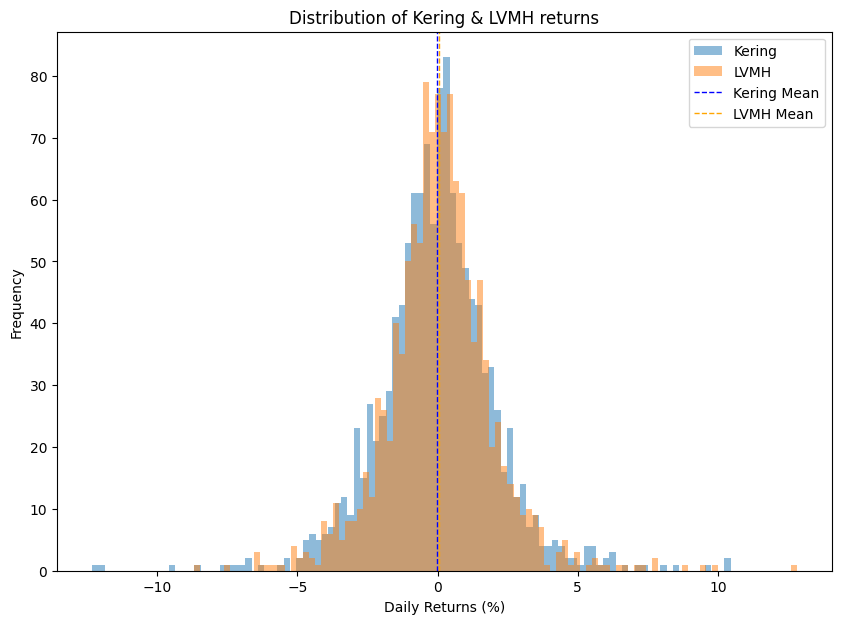

In [26]:
choix_plot = ["KER.PA", "MC.PA"]

a = stocks_return[choix_plot[0]]
b = stocks_return[choix_plot[1]]
                  
plt.figure(figsize = (10,7))
a.plot(kind='hist', label="Kering", bins=100, alpha=0.5)
b.plot(kind='hist', label="LVMH", bins=100, alpha=0.5)

plt.title("Distribution of Kering & LVMH returns")
plt.xlabel("Daily Returns (%)")

mean_a = a.mean()
mean_b = b.mean()
plt.axvline(mean_a, color='blue', linestyle='dashed', linewidth=1, label="Kering Mean")
plt.axvline(mean_b, color='orange', linestyle='dashed', linewidth=1, label="LVMH Mean")

plt.legend()
plt.show()

Hum ça ne sert à rien

Un truc utile ! **Risk Returns profil**

In [27]:
fig = px.scatter(stocks_return, x=stocks_return.std(), y=stocks_return.mean(), text=stocks_return.columns, 
                 labels={"x": "Risk","y": "Daily Expected Returns (%)",},title="Stock Risk Vs Returns")

fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Red')#, range=[-0.01, 0.1])
fig.update_traces(textposition='top center')
fig.show()

Conclusion : On voit bien que Kering, ça pue sa mère ! 

# To do

- Trouver une méthode pour tracer l'efficient frontier de Markowitz
- Faire plus d'analyses 
- Tirer des conclusions avec genre une pondération et un ranking des stocks ça peut être rigolo

# Part4: Buy/Sell Indicators

Simple Moving Average (SMA) - à la main (faisable avec cufflinks)

In [28]:
closing_price_df

,KER.PA,MC.PA,RMS.PA,CFR.SW,INTC,AAPL,NVDA
Date,,,,,,,
2019-11-07,458.65,376.58,626.90,73.25,51.21,62.95,5.18
2019-11-08,454.71,375.64,629.03,69.07,51.40,63.12,5.17
2019-11-11,455.59,375.88,626.71,67.52,51.47,63.62,5.18
2019-11-12,466.88,376.02,622.44,67.11,51.34,63.56,5.21
2019-11-13,468.71,374.57,630.78,66.98,51.06,64.17,5.19
...,...,...,...,...,...,...,...
2024-10-31,228.85,609.80,2074.00,125.35,21.52,225.91,132.76
2024-11-01,230.70,611.00,2081.00,126.55,23.20,222.91,135.40
2024-11-04,233.70,606.70,2071.00,125.00,22.52,222.01,136.05


In [29]:
sma_20d = closing_price_df.rolling(20).mean()

sma_50d = closing_price_df.rolling(50).mean()

sma_200d = closing_price_df.rolling(200).mean()


Constuire directement le multi-index avec les dates de ce qu'on va copier ! Et après utiliser les values des sma_xxd  
En soit on perd des valeurs du 10d à cause des 50 et 2000d...à fix

In [30]:
# DataFrame multi-indexé avec la date et les stocks
multi_index = pd.MultiIndex.from_product([sma_20d.index, tickers_symbols], names=["Date", "Stocks"])
sma_df = pd.DataFrame(index=multi_index, columns=["SMA-20d", "SMA-50d", "SMA-200d"])

for stock in tickers_symbols:
    sma_df.loc[(slice(None), stock), "SMA-20d"] = sma_20d[stock].values
    sma_df.loc[(sma_50d.index, stock), "SMA-50d"] = sma_50d[stock].values
    sma_df.loc[(sma_200d.index, stock), "SMA-200d"] = sma_200d[stock].values

sma_df.dropna().head(10)


SMA-20d   SMA-50d   SMA-200d
Date       Stocks                               
2020-09-03 KER.PA   460.265  453.6444  452.21095
           MC.PA    368.986   370.548  359.29995
           RMS.PA   691.059  710.3954  669.17315
           CFR.SW   55.2095   55.5024   59.03575
           INTC       44.37   47.5926    51.1763
           AAPL    117.6195  103.7494     79.407
           NVDA     12.3525   11.0658    7.80125
2020-09-04 KER.PA  463.4145  455.0932   452.4271
           MC.PA    370.347  370.9532   359.3173
           RMS.PA  693.2755  710.4384   669.6428

**Death Cross and Golden Cross**  -- > Comparaison des SMA  
“A death cross occurs when the 50-day SMA crosses below the 200-day SMA. This is considered a bearish signal, that further losses are in store. The golden cross occurs when a short-term SMA breaks above a long-term SMA. This can signal further gains are in store.”

Bordel ce truc m'a pris 4h alors admirons  
-- > **Eviter les multi-index** :')

In [31]:
# Ajouter une colonne "Cross" avec Nan/Death/Golden au sma_df pour après afficher les croix sur le graphe

# Déterminer les croisements pour stock
for ticker in tickers_symbols:
    for i in range(1, len(sma_df.xs(ticker, level="Stocks"))):
        current_date = sma_df.xs(ticker, level="Stocks").index[i]
        previous_date = sma_df.xs(ticker, level="Stocks").index[i - 1]
        sma_df.loc[(current_date, ticker), 'Cross'] = None

        # Golden Cross
        if sma_df.loc[(current_date, ticker), "SMA-200d"] > sma_df.loc[(current_date, ticker), "SMA-50d"] and \
           sma_df.loc[(previous_date, ticker), "SMA-200d"] <= sma_df.loc[(previous_date, ticker), "SMA-50d"]:
            sma_df.loc[(current_date, ticker), 'Cross'] = 'Golden'  

        # Death Cross
        elif sma_df.loc[(current_date, ticker), "SMA-200d"] < sma_df.loc[(current_date, ticker), "SMA-50d"] and \
             sma_df.loc[(previous_date, ticker), "SMA-200d"] >= sma_df.loc[(previous_date, ticker), "SMA-50d"]:
            sma_df.loc[(current_date, ticker), 'Cross'] = 'Death' 

In [32]:
# Créer la figure Plotly
fig = go.Figure()

# Choix de 1 stock sinon c'est ilisible (et oui faudrait faire un truc un POO intéractif..) 
choix_stock = "KER.PA"

sma_data = sma_df.xs(choix_stock, level="Stocks")

# Ajouter les prix
fig.add_trace(go.Scatter(
    x=closing_price_df.index,
    y=closing_price_df[choix_stock],
    mode="lines",
    name=f"Close Price",
    line=dict(color="darkgoldenrod"),
    legendgroup=choix_stock,
    showlegend=True,
    opacity=0.6  # opacité
))

# Tracer la SMA sur 30 jours
fig.add_trace(go.Scatter(
    x=sma_data.index,
    y=sma_data["SMA-50d"],
    mode="lines",
    name=f"{choix_stock} - SMA 50 jours",
    line=dict(color="steelblue"),
    legendgroup=choix_stock,
    showlegend=True
))

# Tracer la SMA sur 120 jours
fig.add_trace(go.Scatter(
    x=sma_data.index,
    y=sma_data["SMA-200d"],
    mode="lines",
    name=f"{choix_stock} - SMA 200 jours",
    line=dict(color="royalblue"),
    legendgroup=choix_stock,
    showlegend=True,
    opacity=0.6  # opacité
))

# Ajouter des marqueurs pour les Golden et Death Crosses
golden_cross_indices = sma_data.index[sma_data['Cross'] == 'Golden']
death_cross_indices = sma_data.index[sma_data['Cross'] == 'Death']

# Placer les marqueurs sur les SMA correspondantes
fig.add_trace(go.Scatter(
    x=golden_cross_indices,
    y=sma_data.loc[golden_cross_indices, "SMA-50d"],
    mode='markers',
    name='Golden Cross',
    marker=dict(color='green', size=10, symbol='cross'),
    legendgroup=stock,
    showlegend=True,
    opacity=0.8
))

fig.add_trace(go.Scatter(
    x=death_cross_indices,
    y=sma_data.loc[death_cross_indices, "SMA-50d"],  # Assurez-vous que cela utilise SMA-10d
    mode='markers',
    name='Death Cross',
    marker=dict(color='red', size=10, symbol='x'),
    legendgroup=stock,
    showlegend=True,
    opacity=0.8
))

# Configuration 
fig.update_layout(
title="Moyennes mobiles pour Kering",
xaxis_title="Date",
yaxis_title="SMA",
hovermode="closest",
xaxis_rangeslider_visible=True
)

fig.show()

**Bollinger Band Plots**  
Bollinger band plots are a technical analysis tool composed of three lines, a simple moving average (SMA) and two bounding lines above and below the average. Most commonly, the bounding bands are +/- 2 standard deviations from a 20-day SMA.  
One major use case for Bollinger band plots is to help understand undersold vs. oversold stocks. As a stock’s market price moves closer to the upper band, the stock is perceived to be overbought, and as the price moves closer to the lower band, the stock is more oversold.

In [33]:
# Créer la figure Plotly
fig = go.Figure()

# Choix de 1 stock sinon c'est ilisible (et oui faudrait faire un truc un POO intéractif..) 
choix_stock = tickers_symbols[0]

sma_data = sma_df.xs(choix_stock, level="Stocks")

# Ajouter les prix
fig.add_trace(go.Scatter(
    x=closing_price_df.index,
    y=closing_price_df[choix_stock],
    mode="lines",
    name=f"Close Price",
    line=dict(color="#FFD700"),
    legendgroup=choix_stock,
    showlegend=True,
    opacity=0.6  # opacité
))


# Tracer la SMA sur 20 jours
fig.add_trace(go.Scatter(
    x=sma_data.index,
    y=sma_data["SMA-20d"],
    mode="lines",
    name=f"{choix_stock} - SMA 20 jours",
    line=dict(color='#4682B4'),
    legendgroup=choix_stock,
    showlegend=True
))

# Top Bollinger
fig.add_trace(go.Scatter(
    x=sma_data.index,
    y=sma_data["SMA-20d"]+2*stock_std[choix_stock],
    mode="lines",
    name=f"{choix_stock} - SMA 20 jours",
    line=dict(color="#1E90FF"),
    legendgroup=choix_stock,
    showlegend=True
))

# Bottom Bollinger
fig.add_trace(go.Scatter(
    x=sma_data.index,
    y=sma_data["SMA-20d"]-2*stock_std[choix_stock],
    mode="lines",
    name=f"{choix_stock} - SMA 20 jours",
    line=dict(color="#1E90FF"),
    legendgroup=choix_stock,
    showlegend=True
))


# Configuration 
fig.update_layout(
title="Moyennes mobiles pour Kering",
xaxis_title="Date",
yaxis_title="SMA",
hovermode="closest",
)

fig.show()

# Fin du projet !  
- Penser à faire un requirements.txt avec l'env !
- Appronfondir analyses financières (autres ratio, méthodes...)
- Apprendre Cufflinks package 
- Mettre le tout en POO avec classe stock et une client = plus sympa pour une UI si continuité projet avec un suivi PF sur un rf sklearn ou un xgboost 